<a href="https://colab.research.google.com/github/niikun/mmm/blob/main/Adstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class SimpleConverter()

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.base import BaseEstimator,TransformerMixin

In [6]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# SimpleConvertor

In [21]:
class SimpleConvertor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.x_mean = None
        # self.sd = None
        self.transformed = None

    def fit(self,X,y=None):
        self.x_mean = X.mean(axis=0)
        self.transformed = pd.DataFrame(np.zeros_like(X))
        # self.x_sd = X.std(axis=0)
        print(self.x_mean)
        # print(self.x_sd)
        return self

    def transform(self,X):
        self.transformed.columns = X.columns
        for col in X.columns:
            for row in range(X.shape[0]):
                # self.transformed.loc[row,col] = (X.loc[row,col]-self.x_mean[col])/self.x_sd[col]
                self.transformed.loc[row,col] = X.loc[row,col]/self.x_mean[col]
        return self.transformed

In [22]:
sc = SimpleConvertor()
sc.fit(df)

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64


SimpleConvertor()

In [24]:
%%time
sc.transform(df)

CPU times: user 13.9 s, sys: 51.8 ms, total: 14 s
Wall time: 14.1 s


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.956072,0.959713,0.524671,2.122811,2.378521,0.710002,0.941699,0.384594,0.322719
1,0.957410,0.965608,0.664583,2.893711,3.524216,0.789746,0.923742,0.468640,0.386395
2,0.958163,0.945678,0.594627,0.272349,0.322574,0.232937,0.233430,0.425098,0.413409
3,0.958247,0.944275,0.489693,0.567773,0.624756,0.360247,0.450898,0.821845,0.354075
4,0.958247,0.942310,0.699561,0.549994,0.604363,0.436494,0.522723,0.495677,0.315966
...,...,...,...,...,...,...,...,...,...
16995,1.039292,1.139081,1.818859,0.838609,0.730427,0.634455,0.736201,0.606940,0.537383
16996,1.039376,1.142168,1.259210,0.888539,0.978846,0.835214,0.927733,0.648345,0.381089
16997,1.039627,1.174449,0.594627,1.012610,0.984407,0.870189,0.909777,0.780543,0.499757
16998,1.039627,1.173326,0.664583,1.010718,1.023339,0.907963,0.953669,0.509762,0.413891


In [25]:
class SimpleConvertor2(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.x_mean = None
        # self.sd = None
        self.transformed = None

    def fit(self,X,y=None):
        self.x_mean = X.mean(axis=0)
        self.transformed = pd.DataFrame(np.zeros_like(X))
        # self.x_sd = X.std(axis=0)
        print(self.x_mean)
        # print(self.x_sd)
        return self

    def transform(self,X):
        self.transformed.columns = X.columns
        self.transformed = X/self.x_mean
        return self.transformed

In [26]:
sc2= SimpleConvertor2()
sc2.fit(df)

longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
dtype: float64


SimpleConvertor2()

In [27]:
%%time
sc2.transform(df)

CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 2.08 ms


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.956072,0.959713,0.524671,2.122811,2.378521,0.710002,0.941699,0.384594,0.322719
1,0.957410,0.965608,0.664583,2.893711,3.524216,0.789746,0.923742,0.468640,0.386395
2,0.958163,0.945678,0.594627,0.272349,0.322574,0.232937,0.233430,0.425098,0.413409
3,0.958247,0.944275,0.489693,0.567773,0.624756,0.360247,0.450898,0.821845,0.354075
4,0.958247,0.942310,0.699561,0.549994,0.604363,0.436494,0.522723,0.495677,0.315966
...,...,...,...,...,...,...,...,...,...
16995,1.039292,1.139081,1.818859,0.838609,0.730427,0.634455,0.736201,0.606940,0.537383
16996,1.039376,1.142168,1.259210,0.888539,0.978846,0.835214,0.927733,0.648345,0.381089
16997,1.039627,1.174449,0.594627,1.012610,0.984407,0.870189,0.909777,0.780543,0.499757
16998,1.039627,1.173326,0.664583,1.010718,1.023339,0.907963,0.953669,0.509762,0.413891


# Adstock
## $y = x_1 + \alpha \times y_{t-1}$
$\alpha$は繰り延べ効果をコントロールするハイパーパラメーター

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def adstock(x:np.ndarray,alpha:float)->np.ndarray:
    x_decay = np.zeros_like(x)
    x_decay[0] = x[0]
    for i in range(1,len(x)):
        x_decay[i] = x[i] + alpha * x_decay[i-1]

    return x_decay

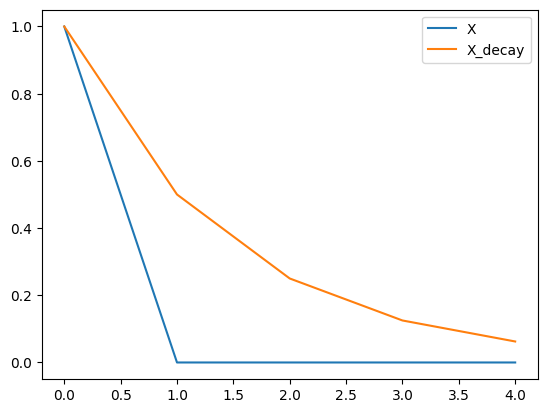

In [17]:
X = np.array([1,0,0,0,0]).astype(float)
X_decay = adstock(X,0.5)
plt.plot(X,label="X")
plt.plot(X_decay,label="X_decay")
plt.legend()
plt.show()

In [30]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from typing import List

class Adstock(BaseEstimator, TransformerMixin):
    def __init__(self, alpha: float):
        self.alpha = alpha
        self.transformed = None

    def fit(self, X: List[float], y=None):
        X = np.array(X).astype(float)  # Fit method should also convert X to a float numpy array
        self.transformed = pd.DataFrame(np.zeros_like(X))
        return self

    def transform(self, X: List[float]):
        X = np.array(X).astype(float)
        self.transformed.iloc[0] = X[0]

        for i in range(1, len(X)):
            self.transformed.iloc[i] = X[i] + self.alpha * self.transformed.iloc[i-1]
        return self.transformed

# サンプルデータ
X = [1, 0, 0]
alpha = 0.5

# Adstockインスタンスの作成と使用
adstock_transformer = Adstock(alpha=alpha)
adstock_transformer.fit(X)
X_decay = adstock_transformer.transform(X)

print(X_decay)


      0
0  1.00
1  0.50
2  0.25
